In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
fer = pd.read_csv("../fer2013/fer2013.csv")

In [3]:
fer.pixels = fer.pixels.apply(lambda i: np.fromstring(i, sep=' '))
emotion = {0:'Angry',1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}

In [4]:
train = fer[['emotion','pixels']][fer['Usage']=='Training']
public_test = fer[['emotion','pixels']][fer['Usage']=='PublicTest']
private_test = fer[['emotion','pixels']][fer['Usage']=='PrivateTest']

In [5]:
def Xy(xy):
    return np.vstack(xy.pixels.values), np.array(xy.emotion)

In [6]:
X_train,y_train = Xy(train)
X_private_test,y_private_test = Xy(private_test)
X_public_test,y_public_test = Xy(public_test)

In [7]:
def reshape(imgr):
    return imgr.reshape(-1,48,48,1)

In [8]:
X_train = reshape(X_train)
X_public_test = reshape(X_public_test)
X_private_test = reshape(X_private_test)

In [9]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout, Activation
from keras.callbacks import Callback, EarlyStopping
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
from keras_tqdm import TQDMNotebookCallback

Using TensorFlow backend.


In [10]:
def size_of(i):
    return (i,i)
input_shape = (48, 48, 1)

In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size=size_of(3), strides=size_of(2), activation='relu',
                 data_format="channels_last", input_shape=input_shape))
model.add(MaxPooling2D(pool_size=size_of(2), strides=size_of(2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=size_of(3), activation='relu'))
model.add(MaxPooling2D(pool_size=size_of(2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=size_of(3), activation='relu'))
model.add(MaxPooling2D(pool_size=size_of(2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(7, activation='softmax'))

In [12]:
epochs = 25
batch_size = 1000
learning_rate = 0.1
momentum = 0.8
decay_rate = learning_rate/epochs

In [13]:
# define SGD optimizer
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate)
# define early stopping callback
earlystopping = EarlyStopping(monitor='acc', min_delta=0.001, patience=2, mode='auto')
# list of callback's
callbacks_list = [TQDMNotebookCallback(), earlystopping]

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 23, 23, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 128)         73856     
__________

In [15]:
model_info = model.fit(X_train, to_categorical(y_train),
                       epochs=epochs, batch_size=batch_size, verbose=0,
                       validation_data=(X_private_test, to_categorical(y_private_test)),
                       callbacks=callbacks_list)

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

A Jupyter Widget

In [16]:
private_test_score = model.evaluate(X_private_test, to_categorical(y_private_test), verbose=1)

3589/3589 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s 357us/step


In [17]:
public_test_score = model.evaluate(X_public_test, to_categorical(y_public_test), verbose=1)

3589/3589 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s 364us/step


In [18]:
print('-'*60)
print('\t\t Private test\t\t Public test')
print('-'*60)
print('Loss\t\t',private_test_score[0],'\t\t',public_test_score[0])
print('Accuracy\t',public_test_score[1],'\t',public_test_score[1])
print('-'*60)

------------------------------------------------------------
		 Private test		 Public test
------------------------------------------------------------
Loss		 1.42564054942 		 1.43730510015
Accuracy	 0.464196154951 	 0.464196154951
------------------------------------------------------------


In [19]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.tight_layout()
    plt.show()

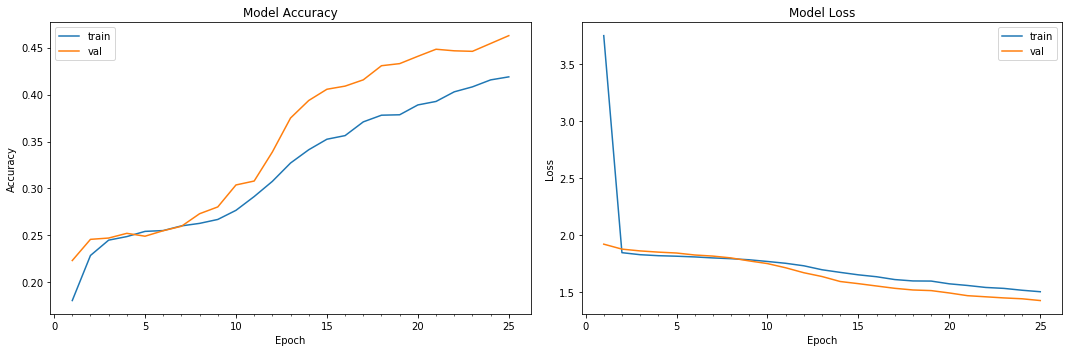

In [20]:
plot_model_history(model_info)

In [21]:
def show_emotion(emo):
        return emotion[np.argmax(emo, axis=None, out=None)]

Originally	 Neutral
Predicted as:	 Neutral


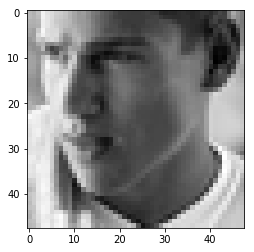

In [22]:
i = 881
plt.imshow(X_public_test[i, :, :, 0], cmap='gray')
print('Originally\t',emotion[y_public_test[i]])
p = model.predict(reshape(X_public_test[i]))
print('Predicted as:\t',show_emotion(p))